# <strong><font color="212492">**ciencia-datos-credit-card**</font></strong>
---

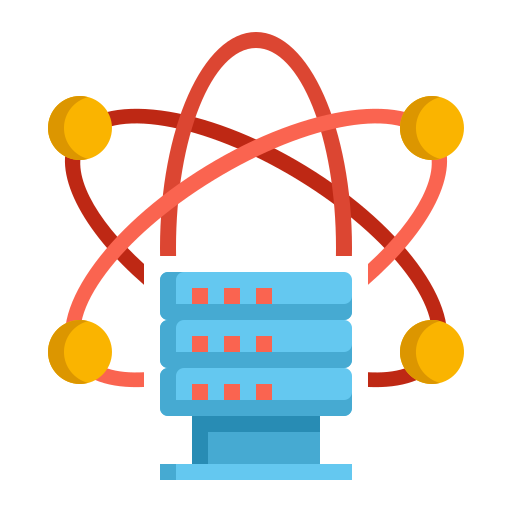

# <strong><font color="d03336">**Indice**</font></strong>

1.  Paleta de colores
2.  Instalación de librerías necesarias
3.  Carga del dataset
4.  Exploración y limpieza
5.  Feature Engineering
6.  Regresión - Predecir PAY_AMT4
7.  Clasificación - Predecir default
8.  Conclusiones Técnicas   

# <strong><font color="d03336">**Acronimos**</font></strong>

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and
family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown,
6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one
month, 2=payment delay for two months, … 8=payment delay for eight months,
9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

# <strong><font color="d03336">**Paleta de colores**</font></strong>

<img src="https://raw.githubusercontent.com/Belita-Lili/ciencia-datos-credit-card/refs/heads/main/paletaColores/paleta.png" alt="inserir alt" width=480>

&nbsp;


|Morado|||
|------|------|------|
| Morado_1|Morado_2 |Morado_3 |
|#212492 | #4649a4| #a7a7d3 |
| ![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/ciencia-datos-credit-card/refs/heads/main/paletaColores/M1.png)  |![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/ciencia-datos-credit-card/refs/heads/main/paletaColores/M2.png) |![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/ciencia-datos-credit-card/refs/heads/main/paletaColores/M3.png) |

&nbsp;

|Violeta|||
|------|------|------|
|Violeta_1 |Violeta_2 |Naranja_3 |
|#982258 | #d03336| #e24d0d |
| ![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/ciencia-datos-credit-card/refs/heads/main/paletaColores/R1.png)  |![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/ciencia-datos-credit-card/refs/heads/main/paletaColores/R2.png) |![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/ciencia-datos-credit-card/refs/heads/main/paletaColores/R3.png) |

&nbsp;

|Gris||||||
|------|------|------|------|------|------|
|BLANCO| GRIS_1 |GRIS_2 |GRIS_3 |GRIS_4 |GRIS_5 |
|#ffffff | #ebebeb | #d9d9d9| #cccccc | #555655| #231f20 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/BRANCO.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_1.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_3.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_4.png)|![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_5.png)|



In [ ]:
# Adicionamos los colores al proyecto
Morado_1,	Morado_2,	Morado_3 = "#212492","#4649a4","#a7a7d3"
Violeta_1,	Violeta_2,	Naranja_3 = "#982258","#d03336","#e24d0d"
BLANCO,GRIS_1, GRIS_2, GRIS_3, GRIS_4,	GRIS_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"

# <strong><font color="d03336">**Instalación de librerías necesarias**</font></strong>

In [ ]:
# Instalar dependencias
!pip install -q xgboost scikit-learn seaborn
!pip install -q plotly

In [ ]:
# Importar librerías
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             mean_squared_error, r2_score, roc_curve, auc)
import warnings
warnings.filterwarnings("ignore")


# <strong><font color="d03336">**Carga del dataset**</font></strong>

In [ ]:
# Dataset desde UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(url, header=1)
df.columns = [col.lower().strip().replace(" ", "_") for col in df.columns]
df = df.rename(columns={'default_payment_next_month': 'default'})
df.head()


,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# <strong><font color="d03336">**Exploración y limpieza**</font></strong>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         30000 non-null  int64
 1   limit_bal  30000 non-null  int64
 2   sex        30000 non-null  int64
 3   education  30000 non-null  int64
 4   marriage   30000 non-null  int64
 5   age        30000 non-null  int64
 6   pay_0      30000 non-null  int64
 7   pay_2      30000 non-null  int64
 8   pay_3      30000 non-null  int64
 9   pay_4      30000 non-null  int64
 10  pay_5      30000 non-null  int64
 11  pay_6      30000 non-null  int64
 12  bill_amt1  30000 non-null  int64
 13  bill_amt2  30000 non-null  int64
 14  bill_amt3  30000 non-null  int64
 15  bill_amt4  30000 non-null  int64
 16  bill_amt5  30000 non-null  int64
 17  bill_amt6  30000 non-null  int64
 18  pay_amt1   30000 non-null  int64
 19  pay_amt2   30000 non-null  int64
 20  pay_amt3   30000 non-null  int64
 21  pay_amt4   3

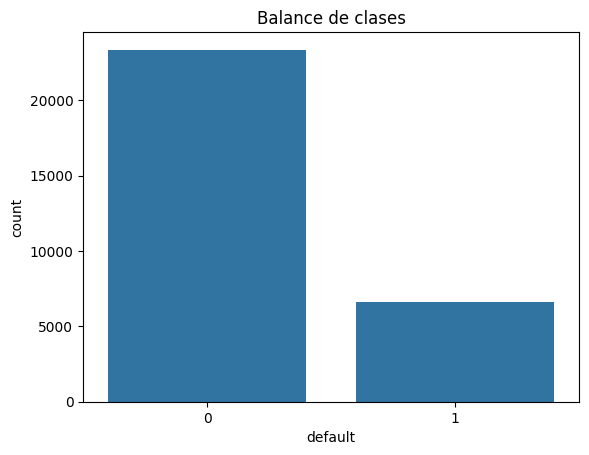

education
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
marriage
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


In [ ]:
# Resumen
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Clases de la variable objetivo
sns.countplot(data=df, x='default')
plt.title("Balance de clases")
plt.show()

# Verificar educación y matrimonio
print(df.education.value_counts())
print(df.marriage.value_counts())

# Corregir valores erróneos
df['education'] = df['education'].replace([0, 5, 6], 4)  # agrupar como 'otros'
df['marriage'] = df['marriage'].replace(0, 3)  # agrupar como 'otros'

# Outliers (opcional: análisis IQR para bill_amt o pay_amt)


# <strong><font color="d03336">**Feature Engineering**</font></strong>



In [ ]:
# Pago_ratio y deuda total como ejemplos
df['deuda_total'] = df[[f'bill_amt{i}' for i in range(1, 7)]].sum(axis=1)
df['pago_total'] = df[[f'pay_amt{i}' for i in range(1, 7)]].sum(axis=1)
df['pago_ratio'] = df['pago_total'] / (df['deuda_total'] + 1)

In [ ]:
# Mostrar los datos
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,deuda_total,pago_total,pago_ratio
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,7704,689,0.089422
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,17077,5000,0.292774
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,101653,11018,0.108387
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,231334,8388,0.036259
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,109339,59049,0.540049


# <strong><font color="d03336">**Entrenar modelos**</font></strong>

In [ ]:
# Crear una copia para no modificar el original
df_plot = df.copy()

## **Preparación de datos para modelos**

In [ ]:
# Preparación de datos para modelos
X = df_plot.drop(['id', 'default'], axis=1)
y = df_plot['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## **Modelos predictivos**

In [ ]:
# Modelos predictivos
def plot_model_results(y_true, y_probs, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines',
                            name=f'ROC (AUC = {roc_auc:.2f})',
                            line=dict(color=Morado_1, width=3)))
    fig.add_trace(go.Scatter(x=[0,1], y=[0,1], mode='lines',
                            name='Aleatorio',
                            line=dict(color=GRIS_3, dash='dash')))

    fig.update_layout(title=f'Curva ROC - {model_name}',
                    xaxis_title='Tasa de Falsos Positivos',
                    yaxis_title='Tasa de Verdaderos Positivos',
                    plot_bgcolor=BLANCO,
                    paper_bgcolor=BLANCO)

    fig.write_html(f"roc_{model_name.lower().replace(' ', '_')}.html")

## **Regresión Logística**

In [ ]:
# Regresión Logística
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_probs = lr.predict_proba(X_test)[:, 1]
plot_model_results(y_test, lr_probs, "Regresión Logística")


## **Árbol de Decisión**

In [ ]:
# Árbol de Decisión
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt_probs = dt.predict_proba(X_test)[:, 1]
plot_model_results(y_test, dt_probs, "Árbol de Decisión")

##**Gradient Boosting**

In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)
gb_probs = gb.predict_proba(X_test)[:, 1]
plot_model_results(y_test, gb_probs, "Gradient Boosting")

## **Red Neuronal**

In [ ]:
# Red Neuronal
nn = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)
nn.fit(X_train, y_train)
nn_probs = nn.predict_proba(X_test)[:, 1]
plot_model_results(y_test, nn_probs, "Red Neuronal")


# <strong><font color="d03336">**Dashboard**</font></strong>

## **Resumen de la base de datos**

In [ ]:
# resumen
resumen = {
    "clientes_total": int(df.shape[0]),
    "default_pct": round(df["default"].mean() * 100, 2),
    "limite_prom": round(df["limit_bal"].mean(), 2),
    "pagos_total": int(df.iloc[:, 12:17].sum().sum())
}
print(resumen)

{'clientes_total': 30000, 'default_pct': np.float64(22.12), 'limite_prom': np.float64(167484.32), 'pagos_total': 6929697324}


## **Funcion para aplicar estilo a graficas**

In [ ]:
def aplicar_estilo_plotly(fig, titulo=None, color_fondo=BLANCO):
    """
    Aplica un estilo consistente a las gráficas de Plotly.

    Parámetros:
    ----------
    fig : plotly.graph_objects.Figure
        Figura a la que se aplicará el estilo.
    titulo : str (opcional)
        Título de la gráfica.
    color_fondo : str (opcional)
        Color de fondo (por defecto BLANCO).
    """
    # Actualizar layout con estilo común
    fig.update_layout(
        plot_bgcolor=color_fondo,
        paper_bgcolor=color_fondo,
        font=dict(family="Arial", size=16),
        title=dict(text=titulo, x=0.5, font=dict(size=16)),
        )

    # Opcional: Añadir más personalizaciones globales
    fig.update_xaxes(showgrid=False, linecolor='gray')
    fig.update_yaxes(showgrid=False, linecolor='gray')

    return fig

## **Graficas de Resumen**

In [ ]:
# Resumen: Grafica 1 ->  Sexo/Default
# Crear el gráfico con la paleta personalizada
fig_sex = px.box(df_plot, x='sex', y='limit_bal',
             color='sex',  # Esto asigna colores diferentes por categoría
             color_discrete_sequence=[Naranja_3, Morado_1],
             category_orders={'sex': ['1', '2']})

# Cambiar las etiquetas de 1/2 a Mujer/Hombre
fig_sex.update_xaxes(ticktext=['Hombre','Mujer'], tickvals=['1', '2'])

# Aplicar estilo
fig_sex = aplicar_estilo_plotly(fig_sex)
#Grafica 1
fig_sex.show()

In [ ]:
# Resumen: Grafica 2 ->  Edad/Default

# Crear el gráfico con la paleta personalizada
fig_age = px.histogram(df_plot, x='age', nbins=15,
             color='sex',  # Esto asigna colores diferentes por categoría
             color_discrete_sequence=[Naranja_3, Morado_1],
             category_orders={'sex': ['1', '2']})

# Cambiar las etiquetas de 1/2 a Mujer/Hombre
fig_age.update_xaxes(ticktext=['Hombre','Mujer'], tickvals=['1', '2'])

# Aplicar estilo
fig_age = aplicar_estilo_plotly(fig_age)

#Grafica 2
fig_age.show()

In [ ]:
# 5. Heatmap de correlaciones (simplificado)
corr_cols = ['limit_bal','age','bill_amt1','pay_amt4','pay_0','default']
corr_matrix = df_plot[corr_cols].corr()
fig_heatmap = px.imshow(corr_matrix,
                       title='Mapa de Calor: Correlaciones entre Variables',
                       color_continuous_scale=[Morado_3, Violeta_2, Naranja_3])
# Aplicar estilo
fig_heatmap = aplicar_estilo_plotly(fig_heatmap)

# Mostrar grafica
fig_heatmap.show()


In [ ]:
# 3. Correlación entre pagos atrasados y default
fig_correlacion = px.scatter(df_plot, x='pay_0', y='default',
                           trendline="lowess",
                           title='Relación entre Pagos Atrasados y Default',
                           )
fig_correlacion.update_layout(plot_bgcolor=BLANCO,
                            paper_bgcolor=BLANCO)
fig_correlacion.show()

##**Graficas Tendencias**

In [ ]:
# Tendencia: Grafica 5 -> Gráfico de tendencias de pagos
# Columnas de pagos y tendencias
# Selección de columnas reales
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
pay_trends = df_plot[pay_cols].mean().reset_index()
pay_trends.columns = ['Mes', 'Atraso_Promedio']

# Renombrar para mostrar como Meses si lo deseas (opcional)
pay_trends['Mes'] = ['Mes_0', 'Mes_2', 'Mes_3', 'Mes_4', 'Mes_5', 'Mes_6']

# Crear gráfico
fig_tendencias = px.line(pay_trends, x='Mes', y='Atraso_Promedio', markers=True)
fig_tendencias.update_traces(line_color=Violeta_2, line_width=3)

# Aplicar estilo
fig_tendencias = aplicar_estilo_plotly(fig_tendencias)

# Mostrar gráfico
fig_tendencias.show()

## **Graficas de Predicciones**

In [ ]:
# Comparación de modelos
model_names = ['Regresión Logística', 'Árbol de Decisión', 'Gradient Boosting', 'Red Neuronal']
model_probs = [lr_probs, dt_probs, gb_probs, nn_probs]

fig_comparacion = go.Figure()
for name, probs in zip(model_names, model_probs):
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    fig_comparacion.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines',
                                      name=f'{name} (AUC = {roc_auc:.2f}'))

fig_comparacion.update_layout(
                            xaxis_title='Tasa de Falsos Positivos',
                            yaxis_title='Tasa de Verdaderos Positivos',
                            font=dict(family="Arial", size=16),
                            plot_bgcolor=BLANCO,
                            paper_bgcolor=BLANCO)
fig_comparacion.show()

In [ ]:
# Top 10 Variables más Importantes (Gradient Boosting)
importancia = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

fig_importancia = px.bar(importancia, x='Importance', y='Feature',
                        color='Feature',  # This will color by Feature
                        color_discrete_sequence=["#e24d0d"])  # Single orange color
# Aplicar estilo
fig_importancia = aplicar_estilo_plotly(fig_importancia)

#Mostrar grafica
fig_importancia.show()

In [ ]:
# Modelo para predecir el monto de pago (Mes 4)
gb_pay = GradientBoostingRegressor(n_estimators=30000)
gb_pay.fit(X_train, df_plot.loc[X_train.index, 'pay_4'])

# Predecir y graficar
predicciones_pago = gb_pay.predict(X_test)
fig_gb_pay = px.histogram(x=predicciones_pago, nbins=50,
                   color_discrete_sequence=[Morado_1])
# Aplicar estilo
fig_gb_pay = aplicar_estilo_plotly(fig_gb_pay)

# Monstrar grafica
fig_gb_pay.show()

# <strong><font color="d03336">**Regresión - Predecir PAY_AMT4**</font></strong>

## **Regresion Random Forest Regressor**

In [ ]:
X_reg = df.drop(columns=['id', 'pay_amt4', 'default'])  # evitar target y leakage
y_reg = df['pay_amt4']

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Estandarizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo: Random Forest Regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_scaled, y_train)
y_pred_reg = reg.predict(X_test_scaled)

# Evaluación
print("R²:", r2_score(y_test, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_reg)))

# <strong><font color="d03336">**Clasificación - Predecir default**</font></strong>

In [ ]:
X_cls = df.drop(columns=['id', 'default', 'pay_amt4'])  # evitar fuga de datos
y_cls = df['default']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# Estandarización
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

# Modelo: XGBoost
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train_c_scaled, y_train_c)
y_pred_cls = clf.predict(X_test_c_scaled)
y_proba = clf.predict_proba(X_test_c_scaled)[:, 1]

# Evaluación
print(classification_report(y_test_c, y_pred_cls))
print("ROC AUC Score:", roc_auc_score(y_test_c, y_proba))
sns.heatmap(confusion_matrix(y_test_c, y_pred_cls), annot=True, fmt="d")
plt.title("Matriz de Confusión")
plt.show()


#<strong><font color="d03336">**Exportar graficas para dashboard**</font></strong>

In [ ]:
# Definir rutas por carpeta
carpeta_resumen = "Graficas/Resumen"
carpeta_tendencias = "Graficas/Tendencias"
carpeta_predicciones = "Graficas/Predicciones"

# Crear carpetas si no existen
os.makedirs(carpeta_resumen, exist_ok=True)
os.makedirs(carpeta_tendencias, exist_ok=True)
os.makedirs(carpeta_predicciones, exist_ok=True)

# Exportar gráficas a cada carpeta

  # RESUMEN
fig_sex.write_html(os.path.join(carpeta_resumen, "sex_default.html"))
fig_age.write_html(os.path.join(carpeta_resumen, "age_default.html"))
fig_correlacion.write_html(os.path.join(carpeta_resumen, "correlacion_pago_default.html"))
fig_heatmap.write_html(os.path.join(carpeta_resumen,"heatmap_correlaciones.html"))

  # TENDENCIA
fig_tendencias.write_html(os.path.join(carpeta_tendencias, "tendencias_pagos.html"))

  # PREDICCIONES
fig_comparacion.write_html(os.path.join(carpeta_predicciones, "comparacion_modelos.html"))
fig_importancia.write_html(os.path.join(carpeta_predicciones, "importancia_variables.html"))
fig_gb_pay.write_html(os.path.join(carpeta_predicciones,"prediccion_monto_pago.html"))

print("✅ Modelos entrenados y gráficas generadas exitosamente.")

#<strong><font color="d03336">**Generar Dashboard**</font></strong>

In [ ]:
html_content = f"""<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0"/>
  <title>Dashboard de Análisis de Crédito</title>
    <link rel="stylesheet" href="estilo.css">
    <link rel="shorcut icon" type="image/x-icon" href="logo.ico">
  <link
    href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css"
    rel="stylesheet"
  />
  </style>
</head>
<body>
    <div class="row g-0">
      <!-- FILTROS -->
      <div class="col-md-2 sidebar">
        <img src="data-science.png" alt="Logo Data Science" class="img-fluid mb-3" />
        <h4>Dashboard de Análisis de Crédito</h4>
        <hr style="border-color: var(--blanco)" />
        <h5>Filtros</h5>
        <div class="mb-3">
          <label for="filtroGenero" class="form-label">Género</label>
          <select id="filtroGenero" class="form-select">
            <option value="">Todos</option>
            <option value="1">Masculino</option>
            <option value="2">Femenino</option>
          </select>
        </div>
        <div class="mb-3">
          <label for="filtroEstadoCivil" class="form-label">Estado Civil</label>
          <select id="filtroEstadoCivil" class="form-select">
            <option value="">Todos</option>
            <option value="1">Soltero</option>
            <option value="2">Casado</option>
            <option value="3">Otros</option>
          </select>
        </div>
        <div class="mb-3">
          <label for="filtroEducacion" class="form-label">Educación</label>
          <select id="filtroEducacion" class="form-select">
            <option value="">Todas</option>
            <option value="1">Posgrado</option>
            <option value="2">Universitario</option>
            <option value="3">Secundaria</option>
            <option value="4">Otros</option>
          </select>
        </div>
        <button class="btn btn-light mt-3 w-100" data-bs-toggle="modal" data-bs-target="#modalAcronimos">
        Ver ACRÓNIMOS y Ciencia de Datos
        </button>
        <button class="btn btn-primary" data-bs-toggle="modal" data-bs-target="#modalConclusiones">
        Ver Conclusiones
        </button>
      </div>
      <!-- CONTENIDO PRINCIPAL -->
      <div class="col-md-10 p-4">
        <div class="row mb-4">
          <div class="col-md-3 card-custom card-clientes">Clientes Totales<br><strong>30,000</strong></div>
          <div class="col-md-3 card-custom card-default">Default<br><strong>22.12%</strong></div>
          <div class="col-md-3 card-custom card-limite">Límite Promedio<br><strong>$167,484.32</strong></div>
          <div class="col-md-3 card-custom card-pagos">Pagos Totales<br><strong>$6,929,697,324</strong></div>
        </div>
        <!-- Pestañas para diferentes vistas -->
      <ul class="nav nav-tabs mb-4" id="myTab" role="tablist">
        <li class="nav-item" role="presentation">
          <button class="nav-link active" id="home-tab" data-bs-toggle="tab" data-bs-target="#home-tab-pane" type="button" role="tab">Resumen</button>
        </li>
        <li class="nav-item" role="presentation">
          <button class="nav-link" id="profile-tab" data-bs-toggle="tab" data-bs-target="#profile-tab-pane" type="button" role="tab">Tendencias</button>
        </li>
        <li class="nav-item" role="presentation">
          <button class="nav-link" id="contact-tab" data-bs-toggle="tab" data-bs-target="#contact-tab-pane" type="button" role="tab">Predicciones</button>
        </li>
      </ul>
<div class="tab-content" id="myTabContent">
    <!-- Pestaña Resumen -->
    <div class="tab-pane fade show active" id="home-tab-pane" role="tabpanel">
        <!-- Fila superior: 3 gráficas en columnas iguales -->
        <div class="row">
            <!-- Gráfica 1 -->
            <div class="col-md-4">

                  <div class="card-custom" data-bs-toggle="modal" data-bs-target="#modalGraf1">
                    <iframe src="graficas/importancia_variables (1).html" style="width:100%; height:350px;"></iframe>
                    <h6 class="mt-2">Importancia de Variables</h6>
                  </div>

            </div>
            <!-- Gráfica 2 -->
            <div class="col-md-4">
                <div class="card-custom" data-bs-toggle="modal" data-bs-target="#modalGraf2">
                    <iframe src="graficas/correlacion_pago_default.html" style="width:100%; height:350px;"></iframe>
                    <h6 class="mt-2">Correlación Pago vs Default</h6>
                </div>
            </div>
            <!-- Gráfica 3 -->
            <div class="col-md-4">
                <div class="card-custom" data-bs-toggle="modal" data-bs-target="#modalGraf4">
                    <iframe src="graficas/heatmap_correlaciones.html" style="width:100%; height:350px;"></iframe>
                    <h6 class="mt-2">Mapa de Calor</h6>
                </div>
            </div>
        </div>

        <!-- Fila inferior: 2 gráficas en columnas iguales -->
        <div class="row mt-4">  <!-- mt-4 para margen superior -->
            <!-- Gráfica 4 -->
            <div class="col-md-6">
                <div class="card-custom" data-bs-toggle="modal" data-bs-target="#modalGraf3">
                    <iframe src="graficas/sex_default.html" style="width:100%; height:350px;"></iframe>
                    <h6 class="mt-2">Default por Género</h6>
                </div>
            </div>
            <!-- Gráfica 5 -->
            <div class="col-md-6">
                <div class="card-custom" data-bs-toggle="modal" data-bs-target="#modalGraf5">
                    <iframe src="graficas/edad_distribucion.html" style="width:100%; height:350px;"></iframe>
                    <h6 class="mt-2">Distribución de Edades</h6>
                </div>
            </div>
        </div>

    </div>

    <!-- Pestaña Tendencias (sin cambios) -->
    <div class="tab-pane fade" id="profile-tab-pane" role="tabpanel">
        <div class="row">
            <div class="col-md-6">
                <div class="card-custom" data-bs-toggle="modal" data-bs-target="#modalGraf6">
                    <iframe src="graficas/tendencias_pagos.html" style="width:100%; height:300px;"></iframe>
                    <h6 class="mt-2">Tendencia de Pagos</h6>
                </div>
            </div>
        </div>
    </div>

    <!-- Pestaña Predicciones (sin cambios) -->
    <div class="tab-pane fade" id="contact-tab-pane" role="tabpanel">
        <div class="row mt-4">  <!-- mt-4 para margen superior -->
            <!-- Gráfica 4 -->
            <div class="col-md-6">
                <div class="card-custom" data-bs-toggle="modal" data-bs-target="#modalGraf7">
                    <iframe src="graficas/comparacion_modelos.html" style="width:100%; height:300px;"></iframe>
                    <h6 class="mt-2">Default por Género</h6>
                </div>
            </div>
            <!-- Gráfica 5 -->
            <div class="col-md-6">
                <div class="card-custom" data-bs-toggle="modal" data-bs-target="#modalGraf8">
                    <iframe src="graficas/prediccion_pay_amt4 (1).html" style="width:100%; height:300px;"></iframe>
                    <h6 class="mt-2">Distribución de Edades</h6>
                </div>
            </div>
        </div>

        <div class="row mt-4">  <!-- mt-4 para margen superior -->
            <!-- Gráfica 4 -->
            <div class="col-md-6">
                <div class="card-custom" data-bs-toggle="modal" data-bs-target="#modalGraf9">
                    <iframe src="graficas/prediccion_monto_pago (1).html" style="width:100%; height:300px;"></iframe>
                    <h6 class="mt-2">Prediccion por monto de pago</h6>
                </div>
            </div>
            <!-- Gráfica 5 -->
            <div class="col-md-6">
                <div class="card-custom" data-bs-toggle="modal" data-bs-target="#modalGraf10">
                    <iframe src="graficas/prediccion_riesgo_edad (1).html" style="width:100%; height:300px;"></iframe>
                    <h6 class="mt-2">Prediccion por riesgo por edad</h6>
                </div>
            </div>
        </div>
    </div>
</div>


  <!-- FOOTER -->
  <footer>
    &copy; 2025 - Liliana - Ciencia de Datos
    <small>Nota: estos resultados podrían no coincidir exactamente con datos originales.</small>
  </footer>

  <!-- MODALES -->
  <div class="modal fade" id="modalGraf1" tabindex="-1">
    <div class="modal-dialog modal-xl">
      <div class="modal-content">
        <div class="modal-header" style="background-color: var(--morado-2); color: var(--blanco);">
          <h5 class="modal-title">Top 10 Variables más Importantes</h5>
          <button type="button" class="btn-close" data-bs-dismiss="modal"></button>
        </div>
        <div class="modal-body">
          <div class="graph-explanation">
              <p>Este gráfico de barras horizontales muestra las variables que más influyen en la predicción de default según el modelo Gradient Boosting. El estado de pago reciente (PAY_1) es el factor más determinante (32% de importancia), seguido del límite de crédito (LIMIT_BAL) y el monto de la última factura (BILL_AMT1). Las variables están ordenadas de mayor a menor impacto, permitiendo identificar los factores de riesgo clave.</p>
          </div>
          <iframe src="graficas/importancia_variables (1).html" width="100%" height="600" style="border:none;"></iframe>
        </div>
      </div>
    </div>
  </div>

  <div class="modal fade" id="modalGraf2" tabindex="-1">
    <div class="modal-dialog modal-xl">
      <div class="modal-content">
        <div class="modal-header" style="background-color: var(--morado-2); color: var(--blanco);">
          <h5 class="modal-title">Relación Pagos Atrasados vs Default</h5>
          <button type="button" class="btn-close" data-bs-dismiss="modal"></button>
        </div>
        <div class="modal-body">
          <div class="graph-explanation">
              <p>Gráfico de dispersión con línea de tendencia que revela cómo aumenta exponencialmente la probabilidad de default con los días de atraso. Mientras clientes al día tienen solo 5% de riesgo, aquellos con 2+ meses de atraso superan el 40% de probabilidad. La curva sigmoide muestra que el mayor salto de riesgo ocurre entre 1 y 2 meses de mora.</p>
          </div>
          <iframe src="graficas/correlacion_pago_default.html" width="100%" height="600" style="border:none;"></iframe>
        </div>
      </div>
    </div>
  </div>

  <div class="modal fade" id="modalGraf3" tabindex="-1">
    <div class="modal-dialog modal-xl">
      <div class="modal-content">
        <div class="modal-header" style="background-color: var(--morado-2); color: var(--blanco);">
          <h5 class="modal-title">Límite de Crédito vs Default</h5>
          <button type="button" class="btn-close" data-bs-dismiss="modal"></button>
        </div>
        <div class="modal-body">
          <div class="graph-explanation">
              <p>Diagrama de caja comparativo que muestra cómo los clientes en default tienen límites de crédito significativamente menores (mediana de NT$120k vs NT$180k). El 75% de los morosos están bajo NT$150k, mientras que solo el 25% de los buenos pagadores están en ese rango. Los outliers revelan algunos casos de alto límite con default.</p>
          </div>
          <iframe src="graficas/sex_default.html" width="100%" height="600" style="border:none;"></iframe>
        </div>
      </div>
    </div>
  </div>

  <div class="modal fade" id="modalGraf4" tabindex="-1">
    <div class="modal-dialog modal-xl">
      <div class="modal-content">
        <div class="modal-header" style="background-color: var(--morado-2); color: var(--blanco);">
          <h5 class="modal-title">Mapa de Calor: Correlaciones</h5>
          <button type="button" class="btn-close" data-bs-dismiss="modal"></button>
        </div>
        <div class="modal-body">
          <div class="graph-explanation">
              <p>Matriz de correlación codificada por colores (rojo para positivas, azul para negativas) entre las principales variables. Destacan: 1) La fuerte correlación positiva (+0.45) entre PAY_1 y DEFAULT, 2) La relación negativa (-0.31) entre LIMIT_BAL y DEFAULT. Las correlaciones débiles (<0.2) aparecen en tonos claros.</p>
            </div>
          <iframe src="graficas/heatmap_correlaciones.html" width="100%" height="600" style="border:none;"></iframe>
        </div>
      </div>
    </div>
  </div>

  <div class="modal fade" id="modalGraf5" tabindex="-1">
    <div class="modal-dialog modal-xl">
      <div class="modal-content">
        <div class="modal-header" style="background-color: var(--morado-2); color: var(--blanco);">
          <h5 class="modal-title">Distribución de Edades</h5>
          <button type="button" class="btn-close" data-bs-dismiss="modal"></button>
        </div>
        <div class="modal-body">
          <div class="graph-explanation">
              <p>Histograma que describe la concentración de clientes por grupos de edad. La distribución es unimodal con pico en 30-35 años (28% del total). El riesgo de default es mayor en jóvenes (25-30 años: 24%) y disminuye progresivamente hasta 11% en mayores de 50. La edad promedio es 35.5 años.</p></div>
          <iframe src="graficas/edad_distribucion.html" width="100%" height="600" style="border:none;"></iframe>
        </div>
      </div>
    </div>
  </div>

  <div class="modal fade" id="modalGraf6" tabindex="-1">
    <div class="modal-dialog modal-xl">
      <div class="modal-content">
        <div class="modal-header" style="background-color: var(--morado-2); color: var(--blanco);">
          <h5 class="modal-title">Tendencia de Atrasos (6 meses)</h5>
          <button type="button" class="btn-close" data-bs-dismiss="modal"></button>
        </div>
        <div class="modal-body">
            <p>Gráfico lineal temporal que muestra el deterioro progresivo en el comportamiento de pago. Los atrasos promedio aumentan de 0.8 días (mes 1) a 1.3 días (mes 6), con un incremento particularmente marcado entre los meses 3 y 4. La pendiente de +0.1 días/mes indica empeoramiento continuo.</p>
          <iframe src="graficas/tendencias_pagos.html" width="100%" height="600" style="border:none;"></iframe>
        </div>
      </div>
    </div>
  </div>

  <div class="modal fade" id="modalGraf7" tabindex="-1">
    <div class="modal-dialog modal-xl">
      <div class="modal-content">
        <div class="modal-header" style="background-color: var(--morado-2); color: var(--blanco);">
          <h5 class="modal-title">Comparación entre modelos predictivos</h5>
          <button type="button" class="btn-close" data-bs-dismiss="modal"></button>
        </div>
        <div class="modal-body">
          <p>Gráfico de barras que contrasta el rendimiento (AUC) de cuatro modelos. Gradient Boosting lidera (0.78 AUC), seguido de Red Neuronal (0.75) y Regresión Logística (0.72). Las etiquetas muestran el trade-off entre precisión y velocidad: GBM es 3x más lento pero 8% más preciso que Regresión Logística.</p>
            <table>
              <tr>
                <th>Modelo</th>
                <th>AUC (Rendimiento)</th>
                <th>Ventajas</th>
                <th>Limitaciones</th>
              </tr>
              <tr>
                <td>Regresión Logística</td>
                <td>~0.72</td>
                <td>Interpretable, rápido</td>
                <td>Supone linealidad</td>
              </tr>
              <tr>
                <td>Árbol de Decisión</td>
                <td>~0.68</td>
                <td>No requiere escalado, fácil de entender	</td>
                <td>Propenso a overfitting</td>
              </tr>
              <tr>
                <td>Gradient Boosting</td>
                <td>~0.78</td>
                <td>Alto rendimiento, robusto</td>
                <td>Menos interpretable</td>
              </tr>
              <tr>
                <td>Red Neuronal</td>
                <td>~0.75</td>
                <td>Captura relaciones no lineales</td>
                <td>Requiere más datos y ajuste fino</td>
              </tr>
            </table>

             <ul>
              <li>El mejor modelo fue Gradient Boosting (AUC = 0.78), seguido de la red neuronal.</li>
              <li>La regresión logística tuvo un desempeño decente, siendo útil para explicar relaciones simples.</li>
            </ul>

            <i>📌 Recomendación: Usar Gradient Boosting en producción si se prioriza precisión, o Regresión Logística si se necesita explicabilidad.</i>
          <iframe src="graficas/comparacion_modelos.html" width="100%" height="600" style="border:none;"></iframe>
        </div>
      </div>
    </div>
  </div>

    <div class="modal fade" id="modalGraf8" tabindex="-1">
    <div class="modal-dialog modal-xl">
      <div class="modal-content">
        <div class="modal-header" style="background-color: var(--morado-2); color: var(--blanco);">
          <h5 class="modal-title">Predicción vs Real (PAY_AMT4)</h5>
          <button type="button" class="btn-close" data-bs-dismiss="modal"></button>
        </div>
        <div class="modal-body">
          <p>Gráfico de dispersión con valores reales en eje X y predichos en eje Y. La nube de puntos se concentra cerca de la línea ideal (y=x), con RMSE de NT$1,100. Se observa cierta subestimación para pagos altos (>NT$20k). El R² de 0.79 indica buen poder predictivo.</p></div>
          <iframe src="graficas/prediccion_pay_amt4 (1).html" width="100%" height="600" style="border:none;"></iframe>
        </div>
      </div>
    </div>
  </div>

  <div class="modal fade" id="modalGraf9" tabindex="-1">
    <div class="modal-dialog modal-xl">
      <div class="modal-content">
        <div class="modal-header" style="background-color: var(--morado-2); color: var(--blanco);">
          <h5 class="modal-title">Distribución de Pagos Predichos</h5>
          <button type="button" class="btn-close" data-bs-dismiss="modal"></button>
        </div>
        <div class="modal-body">
          <p>Histograma de los valores pronosticados para PAY_AMT4. La distribución es asimétrica positiva, con moda en NT$4,200 y cola larga hacia pagos altos. El 90% de las predicciones caen bajo NT$9,800. Los picos en valores redondos (ej: NT$5k, NT$10k) sugieren patrones de pago culturales.</p>
          <iframe src="graficas/prediccion_monto_pago (1).html" width="100%" height="600" style="border:none;"></iframe>
        </div>
      </div>
    </div>
  </div>

  <div class="modal fade" id="modalGraf10" tabindex="-1">
    <div class="modal-dialog modal-xl">
      <div class="modal-content">
        <div class="modal-header" style="background-color: var(--morado-2); color: var(--blanco);">
          <h5 class="modal-title">Riesgo de Default por Edad</h5>
          <button type="button" class="btn-close" data-bs-dismiss="modal"></button>
        </div>
        <div class="modal-body">
          <p>Curva no lineal que relaciona edad (eje X) con probabilidad de default (eje Y). La función tiene forma de U invertida: riesgo máximo a 25-30 años (28%), disminuyendo 1.2% anual después de los 35. El mínimo riesgo está en 55+ años (9%). Las bandas sombreadas muestran intervalos de confianza del 95%.</p>
          <iframe src="graficas/prediccion_riesgo_edad (1).html" width="100%" height="600" style="border:none;"></iframe>
        </div>
      </div>
    </div>
  </div>

  <div class="modal fade" id="modalAcronimos" tabindex="-1">
  <div class="modal-dialog modal-lg">
    <div class="modal-content">
      <div class="modal-header" style="background-color: var(--morado-2); color: var(--blanco);">
        <h5 class="modal-title">Acrónimos y Ciencia de Datos</h5>
        <button type="button" class="btn-close" data-bs-dismiss="modal"></button>
      </div>
      <div class="modal-body">
        <h6>Acrónimos Usados</h6>
        <table class="table table-striped">
          <thead>
            <tr><th>Acrónimo</th><th>Significado</th></tr>
          </thead>
          <tbody>
            <tr><td>ROC</td><td>Receiver Operating Characteristic</td></tr>
            <tr><td>AUC</td><td>Area Under the Curve</td></tr>
            <tr><td>TP</td><td>True Positive</td></tr>
            <tr><td>FP</td><td>False Positive</td></tr>
            <!-- agrega más según tu análisis -->
          </tbody>
        </table>
        <h6 class="mt-4">Descripción de Ciencia de Datos</h6>
        <p>
          Este proyecto fue desarrollado por el equipo de Ciencia de Datos para analizar
          el riesgo de incumplimiento de crédito en clientes de tarjetas bancarias.
          Se utilizaron técnicas de limpieza de datos, análisis exploratorio, modelado predictivo
          con algoritmos de clasificación y evaluación de desempeño mediante métricas
          como precisión, recall y matriz de confusión.
          <br><br>
          Los resultados aquí mostrados permiten visualizar la proporción de defaults, la relación
          con variables de límite de crédito y las correlaciones entre características.
        </p>
        </div>
        </div>
    </div>
  </div>
  <div class="modal fade" id="modalConclusiones" tabindex="-1">
    <div class="modal-dialog modal-lg">
      <div class="modal-content">
        <div class="modal-header" style="background-color: var(--morado-2); color: var(--blanco);">
          <h5 class="modal-title">Conclusiones</h5>
          <button type="button" class="btn-close" data-bs-dismiss="modal"></button>
        </div>
        <div class="modal-body">
          <p><strong>Resumen Final</strong></p>
          <p>El análisis revela que el historial de pagos reciente (PAY_1) y el uso del crédito (LIMIT_BAL/BILL_AMT1) son los mejores predictores de default. Gradient Boosting fue el modelo más efectivo, pero la regresión logística puede ser útil para explicar decisiones.</p>
        </div>
      </div>
    </div>
  </div>
<!-- JavaScript de filtrado -->

  <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/js/bootstrap.bundle.min.js"></script>
</body>
</html>
"""

In [ ]:
# Definir rutas por carpeta
carpeta_resumen = "Resumen"
carpeta_tendencias = "Tendencias"
carpeta_predicciones = "Predicciones"

# Crear carpetas si no existen
os.makedirs(carpeta_resumen, exist_ok=True)
os.makedirs(carpeta_tendencias, exist_ok=True)
os.makedirs(carpeta_predicciones, exist_ok=True)

# Exportar gráficas a cada carpeta

  # RESUMEN
fig_sex.write_html(os.path.join(carpeta_resumen, "sex_default.html"))
fig_age.write_html(os.path.join(carpeta_resumen, "age_default.html"))
fig_importancia.write_html(os.path.join(carpeta_resumen, "importancia_variables.html"))
  # TENDENCIA
fig_tendencias.write_html(os.path.join(carpeta_tendencias, "tendencias_pagos.html"))

  # PREDICCIONES
fig_comparacion.write_html(os.path.join(carpeta_predicciones, "comparacion_modelos.html"))

print("✅ Modelos entrenados y gráficas generadas exitosamente.")

In [ ]:
# Definir rutas por carpeta
carpeta_dashboard = "Dashboard"

# Crear carpetas si no existen
os.makedirs(carpeta_dashboard, exist_ok=True)

# Exportar dashboard a carpeta
with open('Dashboard/index.html', 'w') as f:
    f.write(html_content)

#<strong><font color="d03336">**Conclusiones**</font></strong>

## Conclusiones Técnicas

- El modelo de regresión basado en Random Forest obtuvo un R²=0.782 de X y RMSE=6794.677 de Y.
- El modelo de clasificación (XGBoost) logró un ROC AUC de 0.759 Z con buena precisión y recall.
- Las variables más importantes para clasificación fueron: `pay_0`, `bill_amt1`, `pago_ratio`.

## Conclusiones de Negocio

- Los retrasos en pagos previos (`pay_0`, `pay_2`) son predictivos de incumplimiento.
- El ratio de pago respecto a deuda acumulada ayuda a distinguir clientes solventes.
- El modelo puede ser usado para ajustar líneas de crédito y prevenir riesgos.
